## Logistic Regression 

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea behind using a logistic regression model is to fit a line that can be best used to describe the probability of two outcomes. For that, a basic linear regression line is fitted and then we map the output to a sigmoidal function to get the required probaility.



In [7]:
x = np.arange(1, 11, 1)
y = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

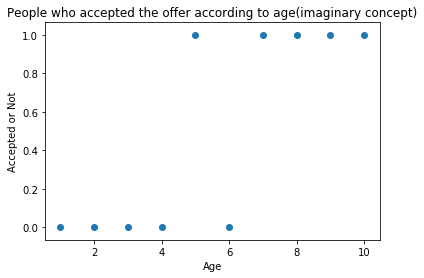

In [12]:
plt.scatter(x, y)
plt.title('People who accepted the offer according to age(imaginary concept)')
plt.ylabel('Accepted or Not')
plt.xlabel('Age')
plt.show()

This is the basic type of data that we apply logistic regression to. Now we apply linear regression to show how that fails.

In [9]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()
regressor.fit(x.reshape(10, 1), y.reshape(10, 1))
y_predict = regressor.predict(x.reshape(10, 1))

Visualising the results

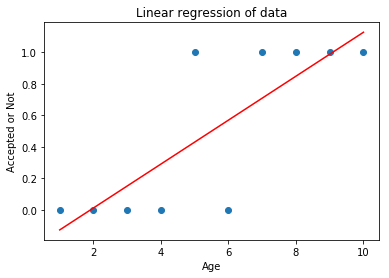

In [21]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='red')
plt.title('Linear regression of data')
plt.ylabel('Accepted or Not')
plt.xlabel('Age')
plt.show()

Currently, the Y values are predicted as 

$Y = b_{0} + b_{1}X$

This however fails to be a good equation for predicting the probability. So we map the predicted result to a sigmoidal function.

In [70]:
import math
def sigmoidal(x):
    exponent = math.exp(x)
    result = exponent/(1+exponent)
    return 0.5*result

The basic formula for the sigmoidal function is,

## $P = \frac{e^{y}}{1+e^{y}}$

In [71]:
result = []
for y_ in y_predict:
    res = sigmoidal(y_)
    result.append(res)
result = np.array(result)
result

array([ 0.23411235,  0.25151513,  0.26890324,  0.28610934,  0.30297301,
        0.31934662,  0.33510013,  0.3501246 ,  0.36433437,  0.37766762])

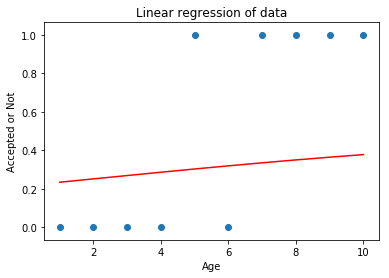

In [72]:
plt.scatter(x, y)
plt.plot(x, result, color='red')
plt.title('Linear regression of data')
plt.ylabel('Accepted or Not')
plt.xlabel('Age')
plt.show()

##### The model looks bad because of insufficient data points and also, our function is not fitted properly. The basic look of a sigmoidal function will look like this.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png"style=" width:450px; margin-left:0px;" />

<a id='preprocessing'></a>
### Pre processing

In [82]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Here we are interested in predicting if the customer buys the model or not depending on his age and his estimated salary.

In [80]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

Splitting into train and test set

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Feature scaling

In [90]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

<a id='building'></a>
### Building the model.
Training the model using Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [92]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
y_pred = classifier.predict(x_test)

In [98]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

We can see that our model has predicted quite accurately with only some false positives and another few false negatives.

<a id='result'></a>
##### Result

In [136]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.001),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.001))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

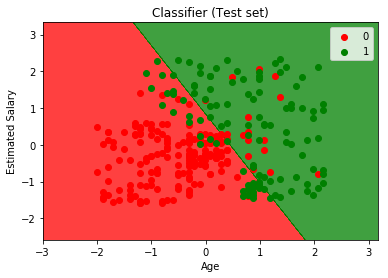

In [137]:
plot_regions(x_train, y_train, 'Classifier (Test set)')

##### Conclusion

We can understand from this model that this suv is most likely to be purchased by older people with higher salaries. However younger people with high salaries also buy this but not all of them do, we can also see that some of the older people with higher salaries also ended up not buying the suv, this could be due to other factors. And also other classification models can better optimise this classification line. The current line is only linear.